In [37]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("vgsales.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [38]:
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


<function matplotlib.pyplot.show(close=None, block=None)>

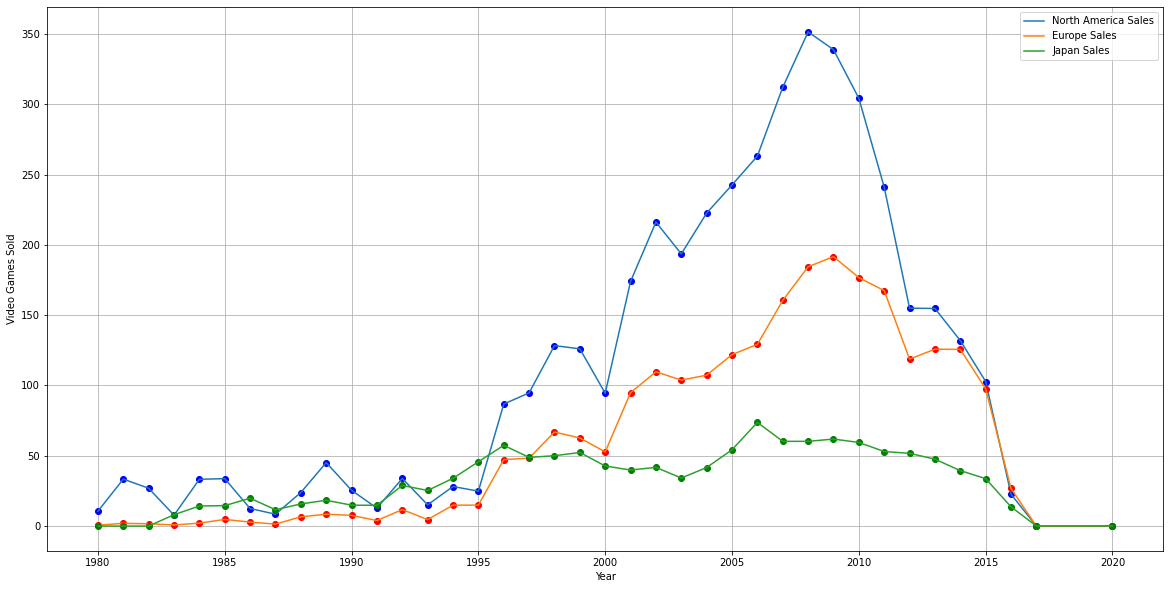

In [59]:
na_sale_year = data.groupby('Year')['NA_Sales'].sum()
eu_sale_year = data.groupby('Year')['EU_Sales'].sum()
jp_sale_year = data.groupby('Year')['JP_Sales'].sum()

plt.figure(figsize=(20,10))
plt.plot(na_sale_year.index, na_sale_year, 'bo')
plt.plot(na_sale_year.index, na_sale_year, label="North America Sales")
plt.plot(eu_sale_year.index, eu_sale_year, 'ro')
plt.plot(eu_sale_year.index, eu_sale_year, label="Europe Sales")
plt.plot(jp_sale_year.index, jp_sale_year, 'go')
plt.plot(jp_sale_year.index, jp_sale_year, label="Japan Sales")
plt.xlabel('Year')
plt.ylabel('Video Games Sold')
plt.grid(True)
plt.legend()
plt.show

The dataset dosn't contain sample from after 2017. The fall in sales number could be explained by the count being stoped at the same time that the digital sales has started replacing physical one.